# Structural Patterns Example: a Maze

We define a maze as a set of rooms. A room knows its neighbors; possible neighbors are another room, a wall, or a door to another room.

The classes Room, Door, and Wall define the components of the maze used in all our examples. We define only the parts of these classes that are important for creating amaze.

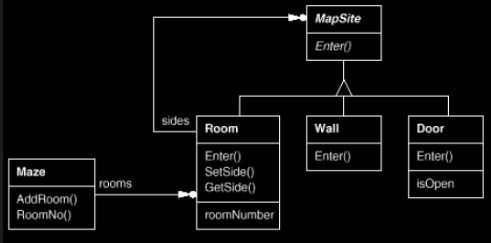

## Original C++ Code

Define classes:

```cpp
enum Direction {North, South, East, West};

class MapSite {
	public:
	virtual void Enter() = 0;
};

class Room : public MapSite {
	public:
		Room(int roomNo);
		MapSite* GetSide(Direction) const;
		void SetSide(Direction, MapSite*);
		virtual void Enter();
	private:
		MapSite* _sides[4];
		int _roomNumber;
};

class Wall : public MapSite {
	public:
		Wall();
		virtual void Enter();
};

class Door : public MapSite {
	public:
		Door(Room* = 0, Room* = 0);
		virtual void Enter();
		Room* OtherSideFrom(Room*);
	private:
		Room* _room1;
		Room* _room2;
		bool _isOpen;
};

class Maze {
	public:
		Maze();
		void AddRoom(Room*);
		Room* RoomNo(int) const;
	private:
	// ...
};
```

Instantiate a maze with two rooms:

```cpp
Maze* MazeGame::CreateMaze () {
	Maze* aMaze = new Maze;
	Room* r1 = new Room(1);
	Room* r2 = new Room(2);
	Door* theDoor = new Door(r1, r2);
	aMaze->AddRoom(r1);
	aMaze->AddRoom(r2);
	r1->SetSide(North, new Wall);
	r1->SetSide(East, theDoor);
	r1->SetSide(South, new Wall);
	r1->SetSide(West, new Wall);
	r2->SetSide(North, new Wall);
	r2->SetSide(East, new Wall);
	r2->SetSide(South, new Wall);
	r2->SetSide(West, theDoor);
	return aMaze;
}
```

## Python Code

In [ ]:
from abc import ABC, abstractmethod

# Assuming Direction is an Enum in C++
from enum import Enum

class Direction(Enum):
    NORTH = 0
    EAST = 1
    SOUTH = 2
    WEST = 3

class MapSite(ABC):
    @abstractmethod
    def Enter(self):
        pass

class Room(MapSite):
    def __init__(self, roomNo: int):
        self._roomNumber = roomNo
        self._sides = [None] * 4

    def GetSide(self, direction: Direction) -> MapSite:
        return self._sides[direction.value]

    def SetSide(self, direction: Direction, site: MapSite):
        self._sides[direction.value] = site

    def Enter(self):
        # Implementation for entering the room
        pass

class Wall(MapSite):
    def __init__(self):
        pass

    def Enter(self):
        # Implementation for entering the wall
        pass
        
class Door(MapSite):
    def __init__(self, room1: Room = None, room2: Room = None):
        self._room1 = room1
        self._room2 = room2
        self._isOpen = False

    def Enter(self):
        # Implementation for entering the door
        pass

    def OtherSideFrom(self, room: Room) -> Room:
        if room == self._room1:
            return self._room2
        elif room == self._room2:
            return self._room1
        else:
            return None

class Maze:
    def __init__(self):
        self._rooms = {}

    def AddRoom(self, room: Room):
        self._rooms[room._roomNumber] = room

    def RoomNo(self, room_number: int) -> Room:
        return self._rooms.get(room_number)

class MazeGame:
    @staticmethod
    def CreateMaze() -> Maze:
        aMaze = Maze()
        r1 = Room(1)
        r2 = Room(2)
        theDoor = Door(r1, r2)
        
        aMaze.AddRoom(r1)
        aMaze.AddRoom(r2)
        
        r1.SetSide(Direction.NORTH, Wall())
        r1.SetSide(Direction.EAST, theDoor)
        r1.SetSide(Direction.SOUTH, Wall())
        r1.SetSide(Direction.WEST, Wall())
        
        r2.SetSide(Direction.NORTH, Wall())
        r2.SetSide(Direction.EAST, Wall())
        r2.SetSide(Direction.SOUTH, Wall())
        r2.SetSide(Direction.WEST, theDoor)
        
        return aMaze

In [ ]:
maze = MazeGame.CreateMaze()
room1 = maze.RoomNo(1)
room2 = maze.RoomNo(2)

print(f"Room 1 sides: {[type(room1.GetSide(direction)).__name__ for direction in Direction]}")
print(f"Room 2 sides: {[type(room2.GetSide(direction)).__name__ for direction in Direction]}")

### Upgrades

Creational patterns lead to a more flexible design by allowing to easily change the classes.

The creational patterns provide different ways to remove explicit references to concrete classes from code that needs to instantiate them:

• If `CreateMaze` calls virtual functions instead of constructor calls to create the rooms, walls, and doors it requires, then you can change the classes that get instantiated by making a subclass of `MazeGame` and redefining those virtual functions. This approach is an example of the Factory Method (121) pattern.
• If `CreateMaze` is passed an object as a parameter to use to create rooms, walls, and doors, then you can change the classes of rooms, walls, and doors by passing a different parameter. This is an example of the Abstract Factory (99) pattern.
• If `CreateMaze` is passed an object that can create a new maze in its entirety using operations for adding rooms, doors, and walls to the maze it builds, then you can use inheritance to change parts of the maze or the way the maze is built. This is an example of the Builder (110) pattern.
• If `CreateMaze` is parameterized by various prototypical room, door, and wall objects, which it then copies and adds to the maze, then you can change the maze's composition by replacing these prototypical objects with different ones. This is an example of the Prototype (133) pattern.

The remaining creational pattern, Singleton (144), can **ensure there's only one maze per game** and that all game objects have ready access to it—without resorting to global variables or functions. Singleton also makes it easy to extend or replace the maze without touching existing code.
